<a href="https://colab.research.google.com/github/anesukafesu/water_potability/blob/main/Water_Potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Task 1: Data Handling

For task 1, we are going to read the data, analyse it, select features, and prepare it for training by scaling and splitting it.



## Task 1.1: Read the data
Using Pandas to read the data and print out the first few rows to see if it has been read correctly.

In [72]:
df = pd.read_csv('./water_potability.csv')
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


## Task 1.2: Summarise the data
Using the describe method to get a summary of the data to identify to perform sanity checks, determine if there are missing values and get a sense of the scale of values in different columns.

In [73]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Task 1.3: Cleaning the data
Dropping all the empty rows and describe the remaining dataset.

In [4]:
df = df.dropna()
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


## Task 1.4: Deciding on important features
Deciding on which features are most important to the target(potability) by plotting a correlation matrix. First we list all the columns in the dataset. Then we create a correlation matrix and lastly visualise the correlations using a heatmap.

In [6]:
columns = list(df.columns)
columns

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

### Task 1.4.1

Creating the correlation matrix

In [7]:
corr = df.corr()
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


### Task 1.4.2: Plotting a heatmap
It seems there is no strong correlation between potability and individual features. There is need to explore data further to see if that is the case.

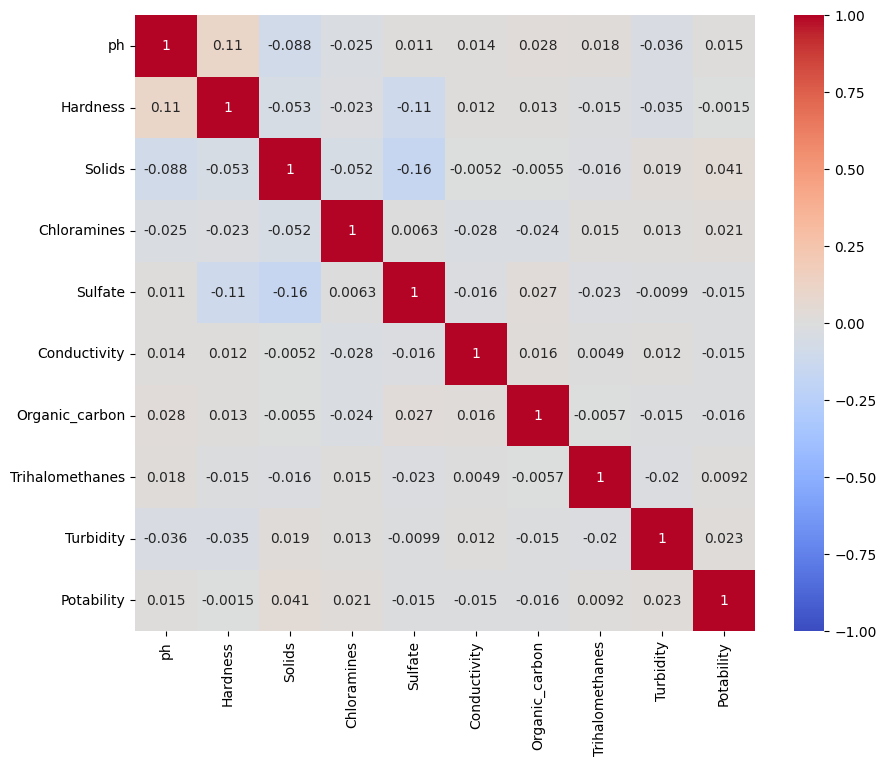

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True,)
plt.show()

### Task 1.4.3 Drawing scatter plots between different features

Trying to determine if there are obvious trends in the way the data is spread in order to determine the potability of water.

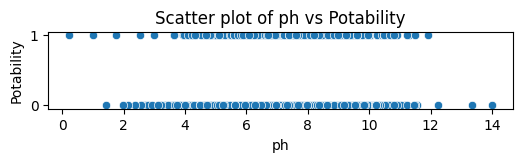

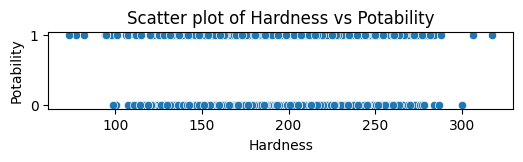

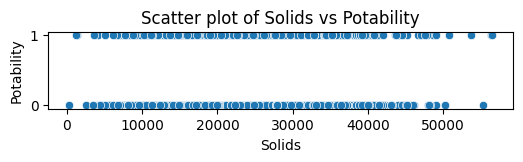

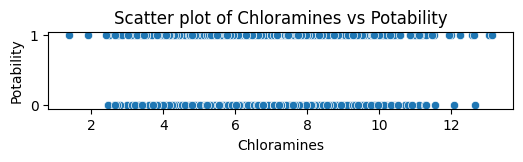

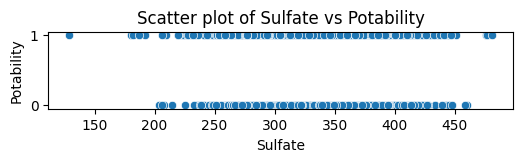

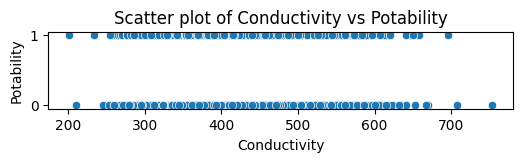

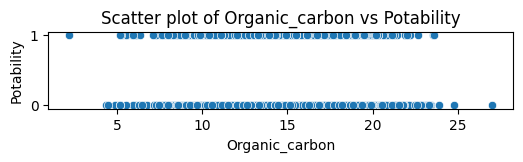

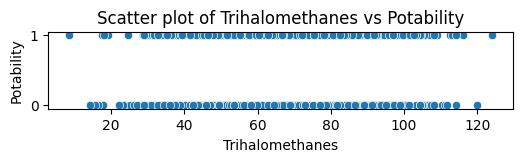

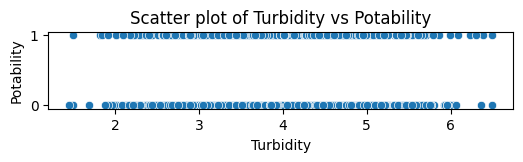

In [9]:
# Create a list of columns to plot by copying the columns list
# And removing the Potability column
columns_to_plot = columns.copy()
columns_to_plot.remove('Potability')

for column in columns_to_plot:
  plt.figure(figsize=(6, 1))
  sns.scatterplot(x=df[column], y=df['Potability'])
  plt.title(f'Scatter plot of {column} vs Potability')
  plt.xlabel(column)
  plt.ylabel('Potability')
  plt.show()

### Task 1.4.5: Conclusion

As shown by the heatmap and the scatterplots that followed, there is no direct correlation between the potability of water and any individual feature. What this suggests is that perhaps the potability of water does not depend on an individual feature but an interplay of several features. For example, water that has high conductivity might be safe, and water with a high ph might also be safe, but water with high conductivity and ph at the same time might not be safe. Therefore there is need to compose superfeatures that combine multiple features. This can be done for us by a multi-layer neural network where the hidden layers combine several features from the previous layer using weights to compose superfeatures that will then be passed to the next layers.

Therefore, rather than selecting features at this stage, we will be using them all to build multi-layer neural networks in the next stage.

## Task 1.5: Preparing the data for training

To prepare the data for training, we are going to scale the data, split the data into features and target, and then split it further into training and testing data.

In [69]:
# Features to be used
X_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
Y_target = ['Potability']

# Extracting the features
X = df[X_features]
Y = df[Y_target]

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the training data from the testing data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state=42)

In [70]:
print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (1608, 9)
Y_train shape: (1608, 1)
X_test shape: (403, 9)
Y_test shape: (403, 1)


# Task 2: Vanilla Model

Training a model without regularisation or optimisation.

## Task 2.1: Defining the model
1. Create the model as a Sequential model.

2.   Add layers to the model:


*   Start by adding a dense layer with 16 units, ReLU activation function, and specify the input dimension to match the number of features in the training data.
*   Add another dense layer with 32 units, ReLU activation function, and specify the input dimension to match the number of features in the training data.
*   Add another dense layer with 1 unit and a sigmoid activation function. This layer will output the probability of water potability.


2.   Compile the model:

*   Compile the model using the `adam` optimizer.
*   Specify the loss function as `binary_crossentropy` since this is a binary classification problem.
*   Include `accuracy` as a metric to track during training.

In [74]:
def create_vanilla_model():
  # Define the model
  model = tf.keras.models.Sequential()

  # Use an Input layer to define the input shape
  model.add(tf.keras.layers.InputLayer(shape=(len(X_features),)))

  # Add layers to the model
  model.add(tf.keras.layers.Dense(units=16, activation='relu'))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

  # Compile the model with basic settings
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

  return model

## Task 2.2: Training the model
1.   Train the model:

*   Use the `fit` method to train the model.
*   Provide the training data (`X_train` and `Y_train`).
*   Set the number of epochs to 100.
*   Specify the batch size as 32.

In [76]:
# Train the model
vanilla_model = create_vanilla_model()

vanilla_model.fit(X_train, Y_train, epochs=200, validation_split=0.2, batch_size=32)

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5648 - loss: 0.6852 - val_accuracy: 0.5652 - val_loss: 0.6773
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5561 - loss: 0.6979 - val_accuracy: 0.5683 - val_loss: 0.6753
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5558 - loss: 0.6865 - val_accuracy: 0.5776 - val_loss: 0.6731
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5904 - loss: 0.6759 - val_accuracy: 0.5807 - val_loss: 0.6717
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5758 - loss: 0.6813 - val_accuracy: 0.5839 - val_loss: 0.6701
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5937 - loss: 0.6781 - val_accuracy: 0.5870 - val_loss: 0.6688
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5768 - loss: 0.6780 - val_accuracy: 0.5901 - val_loss: 0.6675
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5850 - loss: 0.6772 - val_accuracy: 0.5870 - 

In [79]:
loss, accuracy = vanilla_model.evaluate(X_test, Y_test)

print("Model Loss:", loss)
print("Model accuracy:", accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6899 - loss: 0.6134
Model Loss: 0.6243797540664673
Model accuracy: 0.6848635077476501


# Task 3: Adding L1 Regularization to the Model

To prevent overfitting and improve generalization, we will implement the architecture used previously but with L1 regularization. We will also add early stopping to find the best weights and dropout to prevent overfitting.

# Task 3.1: Defining the model

Defining the model with L1 regularization and dropout between layers.

In [96]:
def create_l1_model():
  # Define the model
  model = tf.keras.models.Sequential()

  # Use Input layer to define the input shape (using 'shape' instead of 'input_shape')
  model.add(tf.keras.layers.InputLayer(shape=(len(X_features),)))

  # Adding a hidden layer with L1 regularization
  model.add(tf.keras.layers.Dense(units=16, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)))

  # Add a dropout layer
  model.add(tf.keras.layers.Dropout(rate=0.3))  # the dropout rate

    # Adding a hidden layer with L1 regularization
  model.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)))

  # Add a dropout layer
  model.add(tf.keras.layers.Dropout(rate=0.3))  # the dropout rate

  # Adding the output layer with L1 regularization
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l1(0.001)))

  # Compile the model with the adam optimizer
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

## Task 3.2: Training the model

Training the model with early stopping

In [97]:
# Create the model
l1_model = create_l1_model()

# Setting up early stopping monitoring validation loss and a patience of 10
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the Model
l1_model.fit(X_train, Y_train, epochs=300, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5065 - loss: 0.8549 - val_accuracy: 0.5870 - val_loss: 0.8118
Epoch 2/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5547 - loss: 0.8242 - val_accuracy: 0.6025 - val_loss: 0.8007
Epoch 3/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5932 - loss: 0.8072 - val_accuracy: 0.5994 - val_loss: 0.7940
Epoch 4/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5746 - loss: 0.8108 - val_accuracy: 0.6087 - val_loss: 0.7897
Epoch 5/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5824 - loss: 0.8023 - val_accuracy: 0.5994 - val_loss: 0.7850
Epoch 6/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6172 - loss: 0.7705 - val_accuracy: 0.5963 - val_loss: 0.7794
Epoch 7/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6153 - loss: 0.7838 - val_accuracy: 0.6025 - val_loss: 0.7760
Epoch 8/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6124 - loss: 0.7672 - val_accuracy: 0.6056 - v

## Task 3.3 Evaluating the model

In [98]:
loss, accuracy = l1_model.evaluate(X_test, Y_test)

print("L1 Model Loss:", loss)
print("L1 Model Accuracy:", accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7147 - loss: 0.6336 
L1 Model Loss: 0.6486924886703491
L1 Model Accuracy: 0.6898263096809387


# Task 4: Adding L2 Regularization
Implementing the model with L2 Regularization and adam as the optimiser and dropout.

## Task 4.1: Defining the model
Defining the model with the same architecture as before but with L2 optimisation

In [99]:
def create_l2_model():
  # Initializing the model and setting up dense layers
  model = tf.keras.models.Sequential()

  # Create first layer
  model.add(tf.keras.layers.InputLayer(shape=(len(X_features),)))

  # Add dense layer
  model.add(tf.keras.layers.Dense(units=16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

  # Add a dropout layer
  model.add(tf.keras.layers.Dropout(0.3))

  # Add dense layer
  model.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

  # Add a dropout layer
  model.add(tf.keras.layers.Dropout(0.3))

  # Add the output layer
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # Compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

## Task 4.2: Training the model

Training the model with early stopping

In [100]:
# Setting up early stopping monitoring validation loss and a patience of 10
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

l2_model = create_l2_model()

l2_model.fit(X_train, Y_train, epochs=300, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5448 - loss: 1.0484 - val_accuracy: 0.5963 - val_loss: 0.9848
Epoch 2/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5519 - loss: 0.9755 - val_accuracy: 0.6087 - val_loss: 0.9311
Epoch 3/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5610 - loss: 0.9259 - val_accuracy: 0.6180 - val_loss: 0.8902
Epoch 4/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5663 - loss: 0.8875 - val_accuracy: 0.6180 - val_loss: 0.8563
Epoch 5/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5864 - loss: 0.8517 - val_accuracy: 0.6180 - val_loss: 0.8284
Epoch 6/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5828 - loss: 0.8225 - val_accuracy: 0.6180 - val_loss: 0.8050
Epoch 7/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6066 - loss: 0.8001 - val_accuracy: 0.6180 - val_loss: 0.7849
Epoch 8/300
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6272 - loss: 0.7709 - val_accuracy: 0.6180 - 

## Task 4.3: Evaluating the model

In [101]:
loss, accuracy = l1_model.evaluate(X_test, Y_test)

print("L1 Model Loss:", loss)
print("L1 Model Accuracy:", accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7147 - loss: 0.6336 
L1 Model Loss: 0.6486924886703491
L1 Model Accuracy: 0.6898263096809387


# Task 5: Error Analysis

In this section we will compare the different models and how they perform so as to decide on the best model to use

In [106]:
# Compare Loss and Accuracy
vanilla_model_loss, vanilla_model_accuracy = vanilla_model.evaluate(X_test, Y_test)
l1_model_loss, l1_model_accuracy = l1_model.evaluate(X_test, Y_test)
l2_model_loss, l2_model_accuracy = l2_model.evaluate(X_test, Y_test)

print("Losses")
print("Vanilla Model:", vanilla_model_loss)
print("L1 Model:", l1_model_loss)
print("L2 Model:", l2_model_loss)
print()

print("Accuracies")
print("Vanilla Model:", vanilla_model_accuracy)
print("L1 Model:", l1_model_accuracy)
print("L2 Model:", l2_model_accuracy)
print()

# Compare Precision
def calculate_model_precision(model):
  Y_pred = model.predict(X_test)
  precision_calculator = tf.keras.metrics.Precision()
  precision_calculator.update_state(Y_test, Y_pred)
  return precision_calculator.result().numpy()

vanilla_model_precision = calculate_model_precision(vanilla_model)
l1_model_precision = calculate_model_precision(l1_model)
l2_model_precision = calculate_model_precision(l2_model)

print("Precision")
print("Vanilla Model:", vanilla_model_precision)
print("L1 Model:", l1_model_precision)
print("L2 Model:", l2_model_precision)
print()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6899 - loss: 0.6134 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7147 - loss: 0.6336 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7073 - loss: 0.6207 
Losses
Vanilla Model: 0.6243797540664673
L1 Model: 0.6486924886703491
L2 Model: 0.635040283203125

Accuracies
Vanilla Model: 0.6848635077476501
L1 Model: 0.6898263096809387
L2 Model: 0.6823821067810059

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Precision
Vanilla Model: 0.6666667
L1 Model: 0.7196262
L2 Model: 0.72
